In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading

In [ ]:
df1 = pd.read_csv('2018.csv')
df2 = pd.read_csv('2019.csv')
df3 = pd.read_csv('2020.csv')
df4 = pd.read_csv('2021.csv')
df5 = pd.read_csv('2022.csv')
df6 = pd.read_csv('2023.csv')
df7 = pd.read_csv('2024.csv')
df = pd.concat([df1, df2, df3, df4, df5, df6, df7])

In [ ]:
df.sample(5)

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
311,2023-11-08,12.089583,34.366979,15.765382,42.824236,58.619896,64.013507,4.746007,1.319375,17.980104,...,0.801215,NaN,89.622153,1.336528,222.46934,NaN,NaN,15.954783,756.801979,-0.505972
357,2024-12-23,15.000000,31.740000,10.550000,24.040000,27.890000,12.680000,NaN,1.010000,16.480000,...,NaN,NaN,NaN,1.430000,246.92000,NaN,NaN,NaN,NaN,NaN
306,2018-11-03 00:00:00,70.910000,NaN,11.560000,20.610000,32.170000,NaN,15.670000,0.800000,26.530000,...,0.150000,NaN,77.240000,0.170000,39.50000,NaN,NaN,105.090000,761.750000,0.370000
147,2022-05-28 00:00:00,29.970000,61.100000,3.910000,13.540000,17.460000,22.740000,13.950000,1.100000,53.970000,...,0.760000,NaN,57.060000,2.170000,292.08000,NaN,NaN,55.830000,750.280000,-0.440000
298,2020-10-25 00:00:00,57.930000,NaN,3.880000,15.790000,19.670000,NaN,3.640000,0.200000,8.770000,...,NaN,NaN,77.130000,0.380000,62.77000,NaN,NaN,26.290000,750.650000,-0.490000


# Preprocessing

In [ ]:
df.columns

Index(['Timestamp', 'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)',
       'NO2 (µg/m³)', 'NOx (ppb)', 'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)',
       'Ozone (µg/m³)', 'Benzene (µg/m³)', 'Toluene (µg/m³)', 'Xylene (µg/m³)',
       'O Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)',
       'AT (°C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'RF (mm)', 'TOT-RF (mm)',
       'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)'],
      dtype='object')

In [ ]:
# Keeping useful columns
columns_to_keep = ['Timestamp', 'PM2.5 (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)']
df = df[columns_to_keep]

In [ ]:
df.head(5)

,Timestamp,PM2.5 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³)
0,2018-01-01 00:00:00,54.42,15.47,10.44,0.0,31.30
1,2018-01-02 00:00:00,46.99,14.53,14.64,0.0,20.96
2,2018-01-03 00:00:00,49.68,16.02,24.86,0.0,29.85
3,2018-01-04 00:00:00,72.77,17.80,10.96,0.0,45.53
4,2018-01-05 00:00:00,76.47,17.16,14.87,0.0,25.41


In [ ]:
df.shape

(2557, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2557 entries, 0 to 365
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      2557 non-null   object 
 1   PM2.5 (µg/m³)  2337 non-null   float64
 2   NO2 (µg/m³)    2387 non-null   float64
 3   SO2 (µg/m³)    2382 non-null   float64
 4   CO (mg/m³)     2396 non-null   float64
 5   Ozone (µg/m³)  2381 non-null   float64
dtypes: float64(5), object(1)
memory usage: 139.8+ KB


In [ ]:
# Removing rows having NULL values
df = df.dropna()

In [ ]:
df.shape

(2279, 6)

In [ ]:
# Plot distribution

In [ ]:
def plot_raw_distribution(df, column_name, color='skyblue', bins=20):

    plt.figure(figsize=(10, 5))
    sns.histplot(df[column_name], kde=True, color=color, bins=bins)
    plt.title(f"Distribution of {column_name} (Raw Value)")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


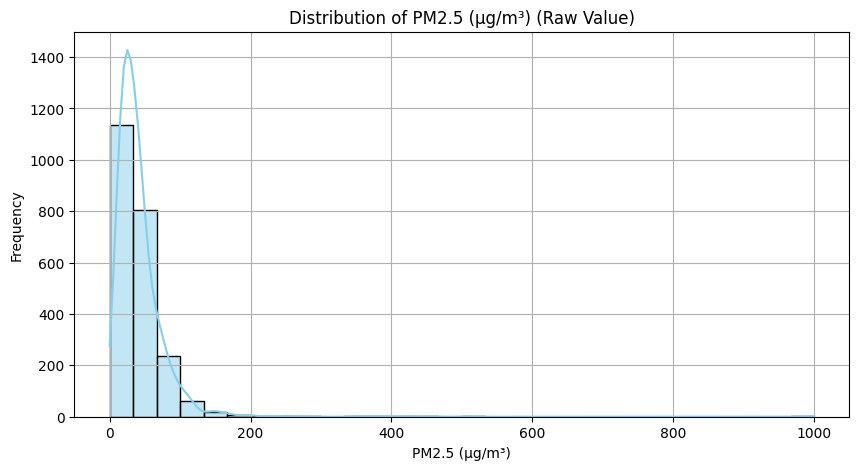

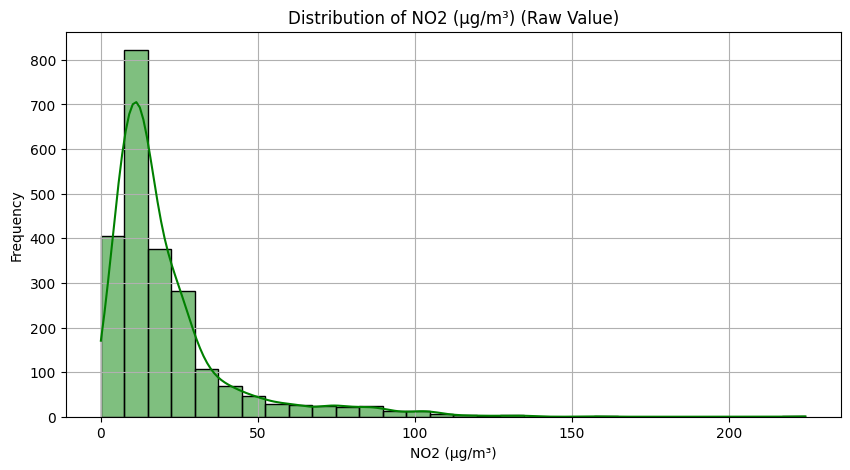

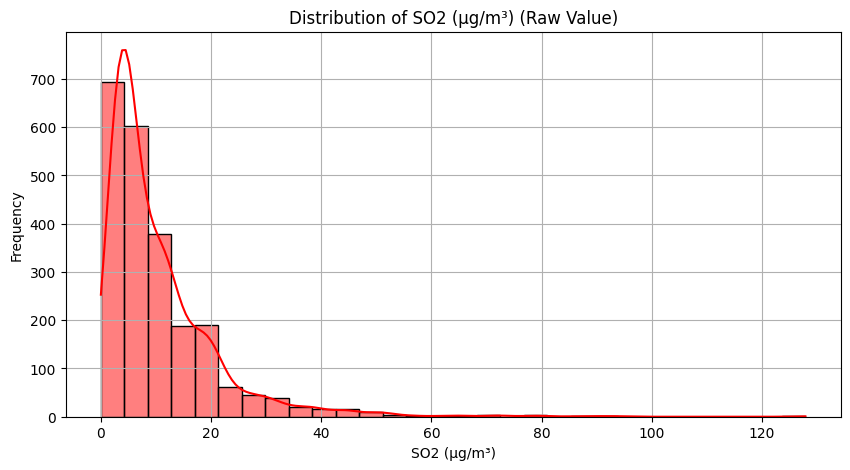

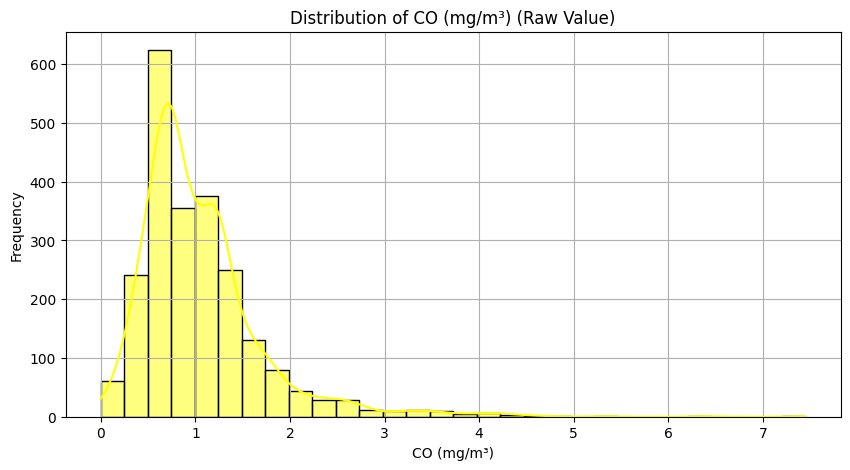

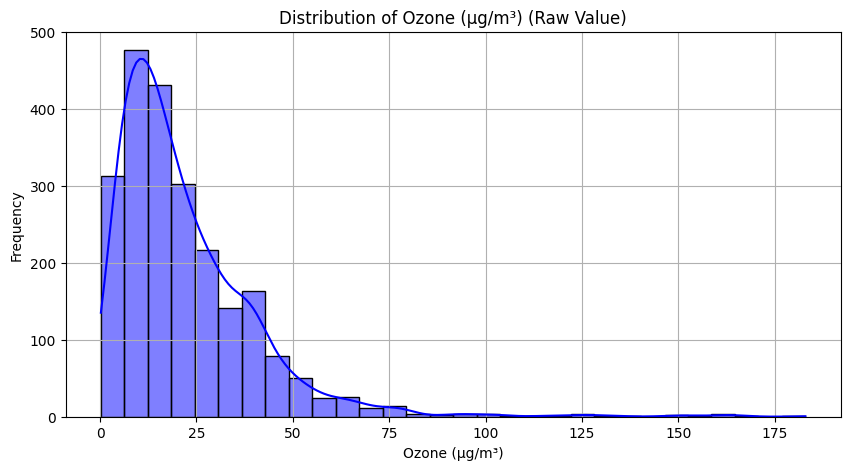

In [ ]:
plot_raw_distribution(df, 'PM2.5 (µg/m³)', color='skyblue', bins=30)
plot_raw_distribution(df, 'NO2 (µg/m³)', color='green', bins=30)
plot_raw_distribution(df, 'SO2 (µg/m³)', color='red', bins=30)
plot_raw_distribution(df, 'CO (mg/m³)', color='yellow', bins=30)
plot_raw_distribution(df, 'Ozone (µg/m³)', color='blue', bins=30)

In [ ]:
# Remove outliers

In [ ]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        # calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [ ]:
pollutants = ['PM2.5 (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)']
df = remove_outliers_iqr(df, pollutants)

In [ ]:
df.shape

(1700, 6)

In [ ]:
## Distribution after removing outliers

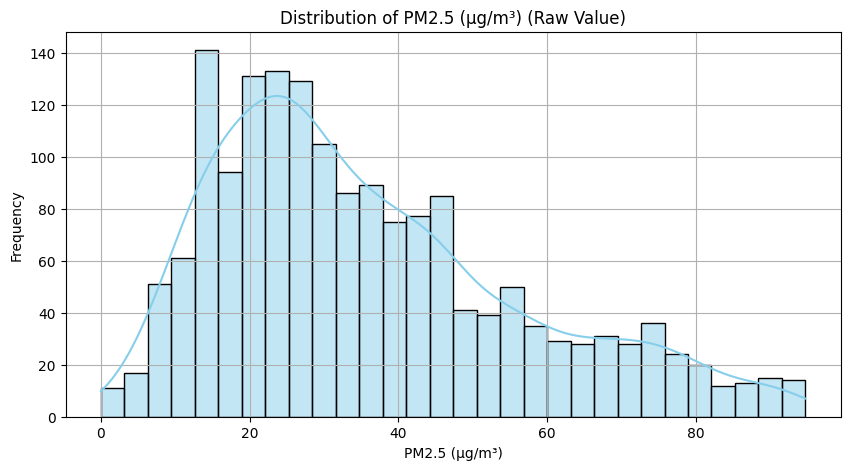

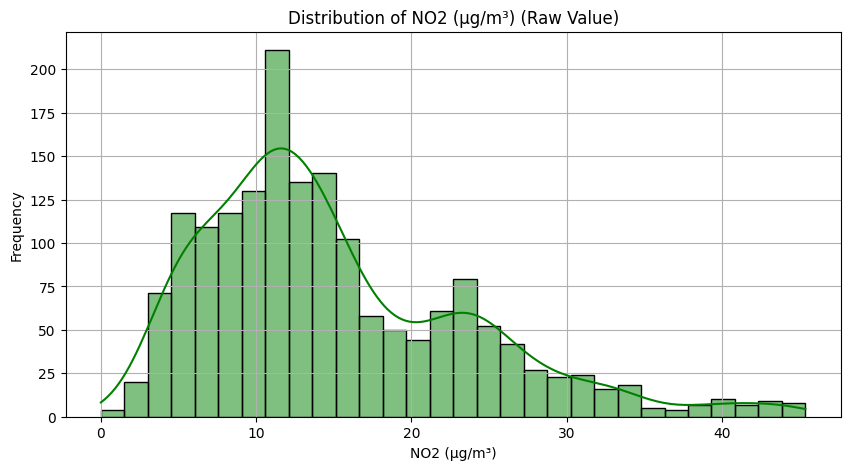

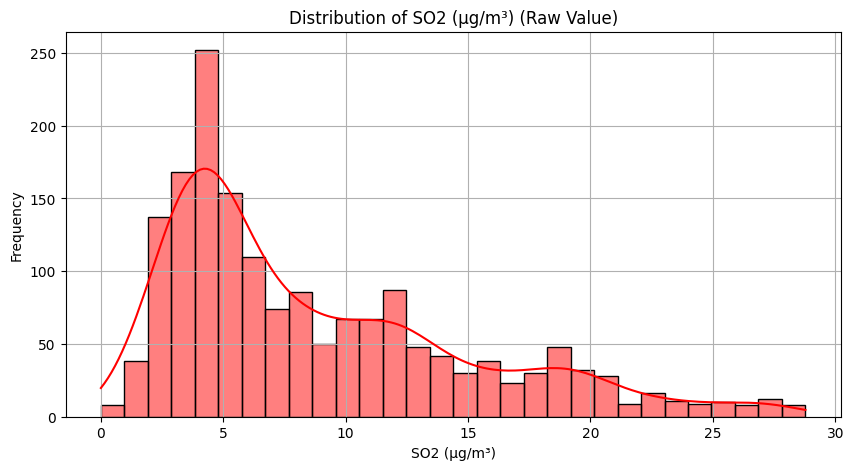

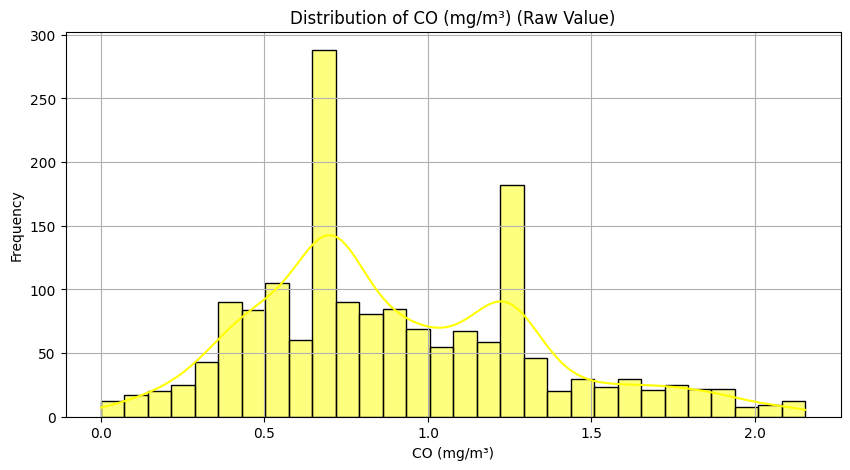

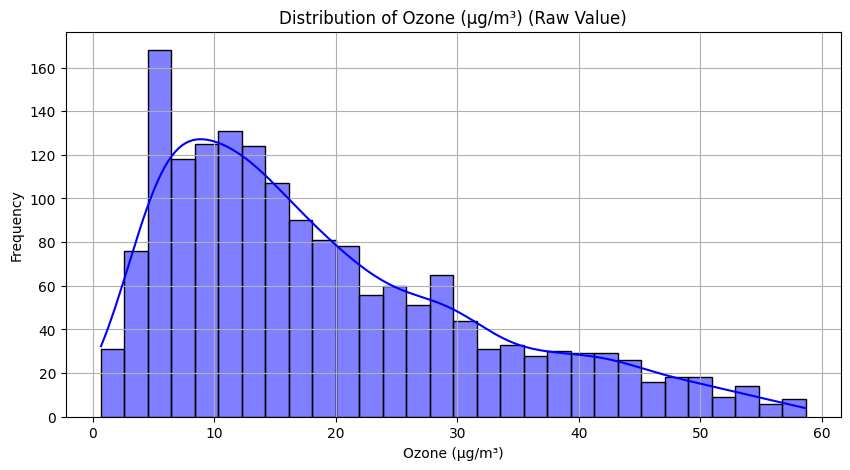

In [ ]:
plot_raw_distribution(df, 'PM2.5 (µg/m³)', color='skyblue', bins=30)
plot_raw_distribution(df, 'NO2 (µg/m³)', color='green', bins=30)
plot_raw_distribution(df, 'SO2 (µg/m³)', color='red', bins=30)
plot_raw_distribution(df, 'CO (mg/m³)', color='yellow', bins=30)
plot_raw_distribution(df, 'Ozone (µg/m³)', color='blue', bins=30)

In [ ]:
# Calculating AQI

In [ ]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5 (µg/m³)"].apply(lambda x: get_PM25_subindex(x))

In [ ]:
## NO2 sub_index calculation
def get_NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x <= 1000:
        return 400 + (x - 400) * 100 / 600
    else:
        return 500

df["NO2_SubIndex"] = df["NO2 (µg/m³)"].apply(get_NO2_subindex)


In [ ]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2 (µg/m³)"].apply(lambda x: get_SO2_subindex(x))

In [ ]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO (mg/m³)"].apply(lambda x: get_CO_subindex(x))

In [ ]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["Ozone (µg/m³)"].apply(lambda x: get_O3_subindex(x))

In [ ]:
df.sample(5)

,Timestamp,PM2.5 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),PM2.5_SubIndex,NO2_SubIndex,SO2_SubIndex,CO_SubIndex,O3_SubIndex
202,2024-07-21,81.71,6.71,1.48,1.24,4.60,172.366667,8.3875,1.8500,62.0,4.60
231,2018-08-20 00:00:00,52.10,26.81,6.98,1.29,27.59,86.833333,33.5125,8.7250,64.5,27.59
17,2024-01-18,55.85,30.42,20.84,0.27,20.12,93.083333,38.0250,26.0500,13.5,20.12
89,2024-03-30,28.35,4.57,5.93,1.65,5.62,47.250000,5.7125,7.4125,82.5,5.62
143,2024-05-23,13.63,10.30,5.79,1.25,10.56,22.716667,12.8750,7.2375,62.5,10.56


In [ ]:
##  Calculating AQI

df["AQI"] = df[[
    "PM2.5_SubIndex",
    "NO2_SubIndex",
    "SO2_SubIndex",
    "CO_SubIndex",
    "O3_SubIndex"
]].max(axis=1).round()


In [ ]:
df.sample(5)

,Timestamp,PM2.5 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),PM2.5_SubIndex,NO2_SubIndex,SO2_SubIndex,CO_SubIndex,O3_SubIndex,AQI
31,2019-02-01 00:00:00,32.72,12.76,10.95,0.55,39.56,54.533333,15.9500,13.6875,27.5,39.56,55.0
244,2020-09-01 00:00:00,37.98,14.45,4.60,0.72,21.91,63.300000,18.0625,5.7500,36.0,21.91,63.0
46,2019-02-16 00:00:00,33.24,11.58,7.79,0.55,19.58,55.400000,14.4750,9.7375,27.5,19.58,55.0
343,2024-12-09,22.94,23.83,13.28,0.78,3.57,38.233333,29.7875,16.6000,39.0,3.57,39.0
349,2021-12-16 00:00:00,36.14,18.50,20.67,0.62,42.19,60.233333,23.1250,25.8375,31.0,42.19,60.0


# Analysis

In [ ]:
AQI = df['AQI']

In [ ]:
AQI.describe()

,AQI
count,1700.000000
mean,72.147647
std,38.977544
min,12.000000
25%,45.000000
50%,62.000000
75%,87.000000
max,216.000000


In [ ]:
Good_aqi = AQI[AQI <= 50]
Satisfactory_aqi = AQI[(AQI > 50) & (AQI <= 100)]
modPolluted_aqi = AQI[(AQI > 100) & (AQI <= 200)]
poor_aqi = AQI[(AQI > 200) & (AQI <= 300)]
veryPoor_aqi = AQI[(AQI > 300) & (AQI <= 400)]
severe_aqi = AQI[(AQI > 400) & (AQI <= 500)]

In [ ]:
print("Good AQI")
print(len(Good_aqi))

print("Satisfactory AQI")
print(len(Satisfactory_aqi))

print("Moderately Polluted AQI")
print(len(modPolluted_aqi))

print("Poor AQI")
print(len(poor_aqi))

print("Very Poor AQI")
print(len(veryPoor_aqi))

print("Severe AQI")
print(len(severe_aqi))


Good AQI
540
Satisfactory AQI
896
Moderately Polluted AQI
244
Poor AQI
20
Very Poor AQI
0
Severe AQI
0


In [ ]:
# converting to date to pd.date
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='mixed', errors='coerce')

In [ ]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Create a 'Season' column
df['Season'] = df['Timestamp'].dt.month.map(get_season)

# Group by season and calculate the average AQI for each season
aqi_season_df = df.groupby('Season')['AQI'].mean()
print(aqi_season_df)

Season
Autumn    68.629454
Spring    66.258216
Summer    62.844156
Winter    88.326923
Name: AQI, dtype: float64


In [ ]:
# Analysis of AQI season_wise

In [ ]:
winter_aqi = df[df.Season=='Winter']
spring_aqi = df[df.Season=='Spring']
summer_aqi = df[df.Season=='Summer']
autumn_aqi = df[df.Season=='Autumn']

/tmp/ipython-input-3665353614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_aqi['Year'] = summer_aqi['Timestamp'].dt.year


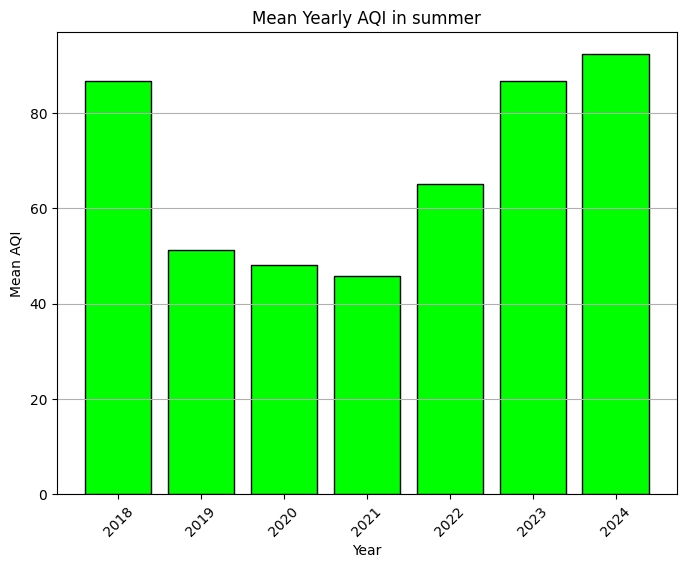

In [ ]:
summer_aqi['Year'] = summer_aqi['Timestamp'].dt.year
mean_yearly_aqi = summer_aqi.groupby('Year')['AQI'].mean().reset_index()
# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(mean_yearly_aqi['Year'], mean_yearly_aqi['AQI'], color='lime', edgecolor='black')
plt.title('Mean Yearly AQI in summer')
plt.xlabel('Year')
plt.ylabel('Mean AQI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-2000574320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_aqi['Year'] = winter_aqi['Timestamp'].dt.year


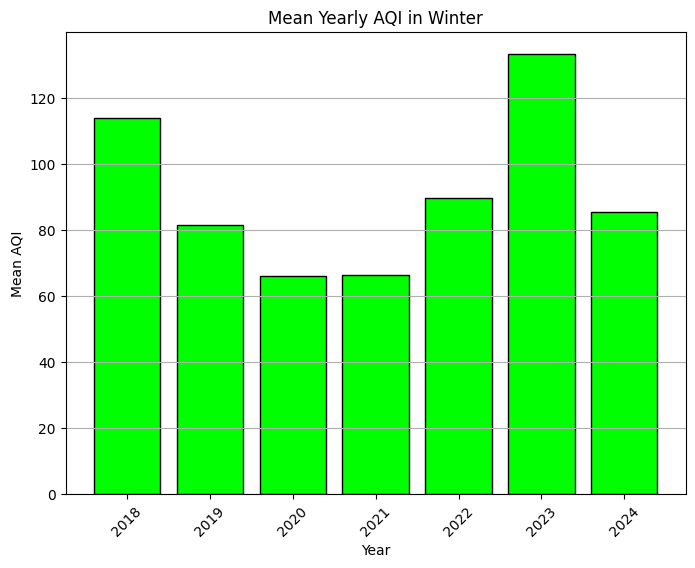

In [ ]:
winter_aqi['Year'] = winter_aqi['Timestamp'].dt.year
mean_yearly_aqi = winter_aqi.groupby('Year')['AQI'].mean().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(mean_yearly_aqi['Year'], mean_yearly_aqi['AQI'], color='lime', edgecolor='black')
plt.title('Mean Yearly AQI in Winter')
plt.xlabel('Year')
plt.ylabel('Mean AQI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-1947098068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spring_aqi['Year'] = spring_aqi['Timestamp'].dt.year


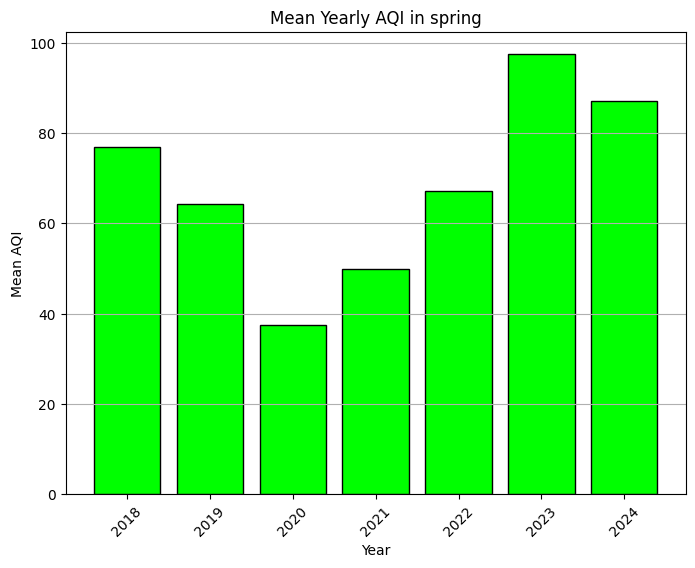

In [ ]:
spring_aqi['Year'] = spring_aqi['Timestamp'].dt.year
mean_yearly_aqi = spring_aqi.groupby('Year')['AQI'].mean().reset_index()
# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(mean_yearly_aqi['Year'], mean_yearly_aqi['AQI'], color='lime', edgecolor='black')
plt.title('Mean Yearly AQI in spring')
plt.xlabel('Year')
plt.ylabel('Mean AQI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-676532096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autumn_aqi['Year'] = autumn_aqi['Timestamp'].dt.year


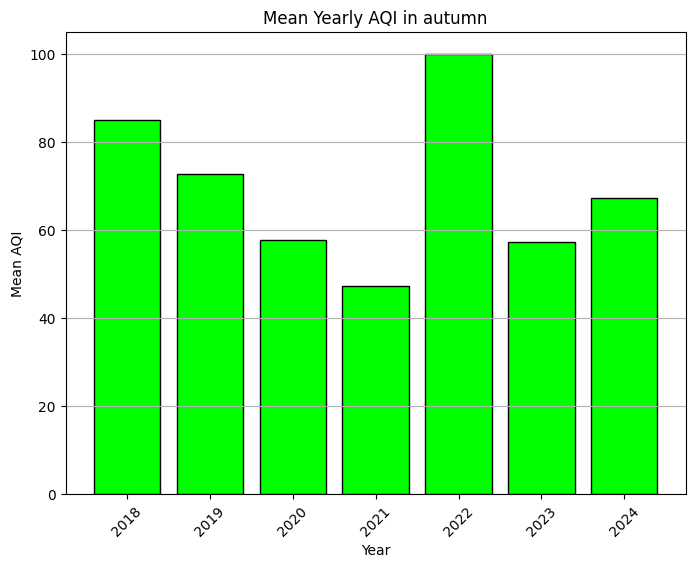

In [ ]:
autumn_aqi['Year'] = autumn_aqi['Timestamp'].dt.year
mean_yearly_aqi = autumn_aqi.groupby('Year')['AQI'].mean().reset_index()
# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(mean_yearly_aqi['Year'], mean_yearly_aqi['AQI'], color='lime', edgecolor='black')
plt.title('Mean Yearly AQI in autumn')
plt.xlabel('Year')
plt.ylabel('Mean AQI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

/tmp/ipython-input-1099741311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_aqi['Season'] = 'Summer'
/tmp/ipython-input-1099741311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_aqi['Season'] = 'Winter'
/tmp/ipython-input-1099741311.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

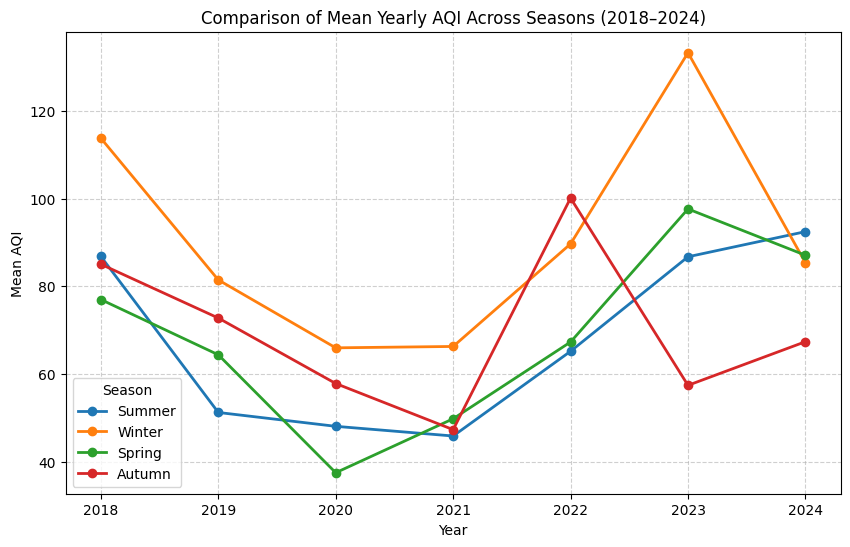

In [ ]:
# Combine all four seasonal data into one DataFrame for comparison
summer_aqi['Season'] = 'Summer'
winter_aqi['Season'] = 'Winter'
spring_aqi['Season'] = 'Spring'
autumn_aqi['Season'] = 'Autumn'

# Create a combined dataframe with Year, AQI, and Season columns
combined_aqi = pd.concat([
    summer_aqi.groupby('Year')['AQI'].mean().reset_index().assign(Season='Summer'),
    winter_aqi.groupby('Year')['AQI'].mean().reset_index().assign(Season='Winter'),
    spring_aqi.groupby('Year')['AQI'].mean().reset_index().assign(Season='Spring'),
    autumn_aqi.groupby('Year')['AQI'].mean().reset_index().assign(Season='Autumn')
])

# Plot: Mean Yearly AQI comparison across seasons
plt.figure(figsize=(10, 6))
for season in combined_aqi['Season'].unique():
    data = combined_aqi[combined_aqi['Season'] == season]
    plt.plot(data['Year'], data['AQI'], marker='o', linewidth=2, label=season)

plt.title('Comparison of Mean Yearly AQI Across Seasons (2018–2024)')
plt.xlabel('Year')
plt.ylabel('Mean AQI')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Season')
plt.xticks(combined_aqi['Year'].unique())
plt.show()


In [ ]:
df.sample(5)

,Timestamp,PM2.5 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),PM2.5_SubIndex,NO2_SubIndex,SO2_SubIndex,CO_SubIndex,O3_SubIndex,AQI,Season
239,2018-08-28,26.56,17.83,9.00,0.54,31.22,44.266667,22.2875,11.2500,27.0,31.22,44.0,Summer
117,2018-04-28,7.74,18.85,5.74,1.50,19.99,12.900000,23.5625,7.1750,75.0,19.99,75.0,Spring
286,2020-10-13,17.92,10.59,5.17,0.13,10.50,29.866667,13.2375,6.4625,6.5,10.50,30.0,Autumn
246,2024-09-03,8.68,4.66,4.82,0.27,3.53,14.466667,5.8250,6.0250,13.5,3.53,14.0,Autumn
102,2020-04-12,13.42,18.81,2.57,0.40,12.67,22.366667,23.5125,3.2125,20.0,12.67,24.0,Spring


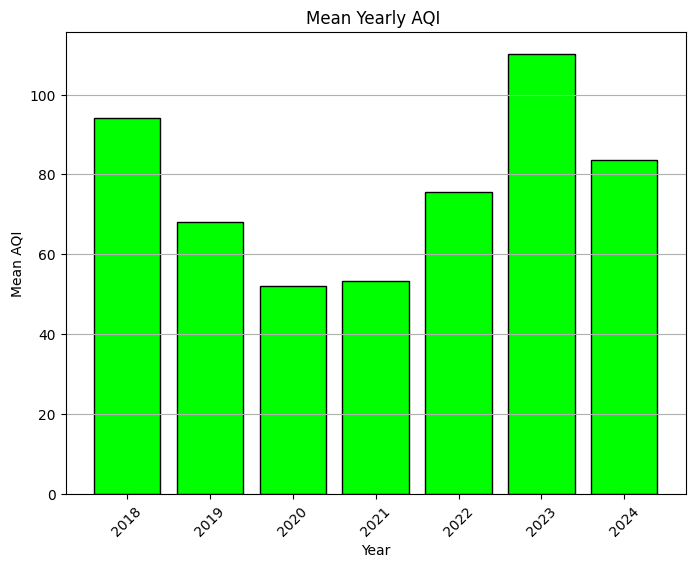

In [ ]:
df['Year'] = df['Timestamp'].dt.year
mean_yearly_aqi = df.groupby('Year')['AQI'].mean().reset_index()
# Plot the bar plot
plt.figure(figsize=(8, 6))
plt.bar(mean_yearly_aqi['Year'], mean_yearly_aqi['AQI'], color='Lime', edgecolor='black')
plt.title('Mean Yearly AQI ')
plt.xlabel('Year')
plt.ylabel('Mean AQI')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
yearly_stats = df.groupby(pd.to_datetime(df['Timestamp']).dt.year)['AQI'].agg(['mean', 'std', 'max'])

for year, stats in yearly_stats.iterrows():
    print(
        f"{year}: The mean AQI was {stats['mean']:.2f} with a standard deviation of {stats['std']:.1f}.\n"
        f" The maximum recorded AQI was {stats['max']:.1f}.\n"
    )


2018: The mean AQI was 94.21 with a standard deviation of 42.2.
 The maximum recorded AQI was 213.0.

2019: The mean AQI was 68.08 with a standard deviation of 30.7.
 The maximum recorded AQI was 216.0.

2020: The mean AQI was 52.04 with a standard deviation of 26.2.
 The maximum recorded AQI was 203.0.

2021: The mean AQI was 53.24 with a standard deviation of 23.8.
 The maximum recorded AQI was 162.0.

2022: The mean AQI was 75.66 with a standard deviation of 29.6.
 The maximum recorded AQI was 201.0.

2023: The mean AQI was 110.19 with a standard deviation of 47.8.
 The maximum recorded AQI was 209.0.

2024: The mean AQI was 83.67 with a standard deviation of 45.7.
 The maximum recorded AQI was 215.0.



In [ ]:
df['Month'] = df['Timestamp'].dt.month
df['Month_Name'] = df['Timestamp'].dt.strftime('%B')  # 'January', 'February', etc.


In [ ]:
monthly_avg_aqi = df.groupby('Month_Name')['AQI'].mean().reset_index()


In [ ]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_avg_aqi['Month_Name'] = pd.Categorical(monthly_avg_aqi['Month_Name'], categories=month_order, ordered=True)
monthly_avg_aqi = monthly_avg_aqi.sort_values('Month_Name')


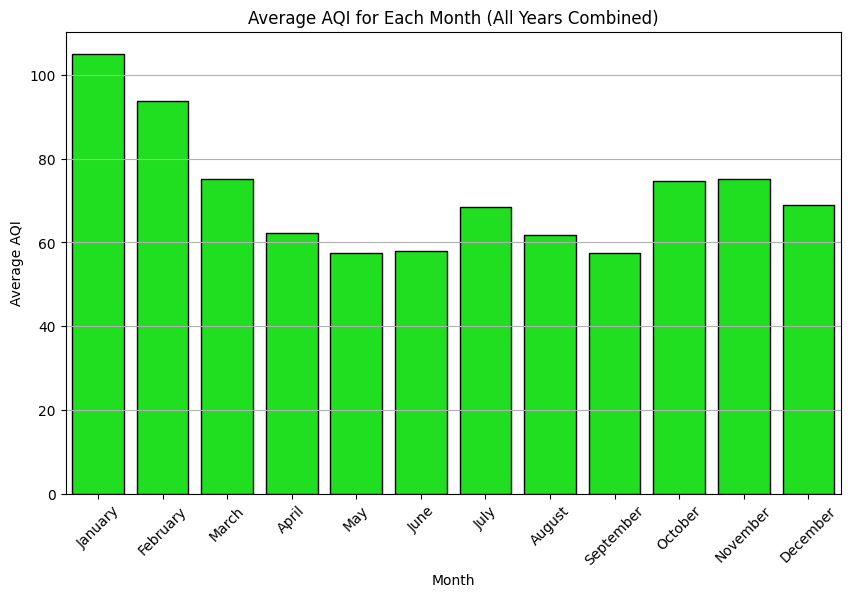

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_avg_aqi, x='Month_Name', y='AQI', color='Lime',edgecolor = 'black')
plt.xticks(rotation=45)
plt.title("Average AQI for Each Month (All Years Combined)")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.grid(axis = 'y')
plt.show()


# ML_Model


In [ ]:
df.sample(5)

,Timestamp,PM2.5 (µg/m³),NO2 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),PM2.5_SubIndex,NO2_SubIndex,SO2_SubIndex,CO_SubIndex,O3_SubIndex,AQI,Season,Year,Month,Month_Name
365,2020-12-31,20.47,11.30,8.24,0.70,8.78,34.116667,14.1250,10.3000,35.0,8.78,35.0,Winter,2020,12,December
120,2022-05-01,24.07,4.42,12.50,1.64,34.63,40.116667,5.5250,15.6250,82.0,34.63,82.0,Spring,2022,5,May
283,2020-10-10,31.20,10.45,5.09,0.43,4.44,52.000000,13.0625,6.3625,21.5,4.44,52.0,Autumn,2020,10,October
80,2024-03-21,55.70,6.50,1.80,1.66,6.36,92.833333,8.1250,2.2500,83.0,6.36,93.0,Spring,2024,3,March
337,2024-12-03,15.53,22.67,12.28,0.34,6.69,25.883333,28.3375,15.3500,17.0,6.69,28.0,Winter,2024,12,December


In [ ]:
df.drop([ 'PM2.5 (µg/m³)','NO2 (µg/m³)','SO2 (µg/m³)','CO (mg/m³)','Ozone (µg/m³)','Season','Year', 'Month', 'Month_Name'], axis=1, inplace=True)

In [ ]:
df.sample(5)

,Timestamp,PM2.5_SubIndex,NO2_SubIndex,SO2_SubIndex,CO_SubIndex,O3_SubIndex,AQI
275,2024-10-02,39.200000,11.6750,6.8875,45.5,10.61,46.0
21,2021-01-22,36.083333,14.1000,10.3000,35.0,4.34,36.0
208,2019-07-28,42.683333,25.1000,5.1250,34.0,47.76,48.0
48,2021-02-18,97.583333,14.1375,5.1500,35.0,13.45,98.0
293,2018-10-21,121.133333,32.2875,10.4000,57.0,24.36,121.0


In [ ]:
df1 = df.copy()
df2 = df.copy()

In [ ]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
# Convert Date column (if exists)
if 'Timestamp' in df.columns:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.sort_values('Timestamp')

# Keep only numeric columns
df = df.select_dtypes(include=['float64', 'int64'])

# Target column
TARGET = 'AQI'   # ⚠️ change if needed

df = df[[TARGET]].dropna()
df.reset_index(drop=True, inplace=True)

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


In [ ]:
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

TIME_STEPS = 30

X, y = create_sequences(scaled_data, TIME_STEPS)
print(X.shape, y.shape)


(1670, 30, 1) (1670, 1)


In [ ]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


RNN

In [ ]:
rnn_model = Sequential([
    SimpleRNN(64, activation='tanh', input_shape=(TIME_STEPS, 1)),
    Dense(1)
])

rnn_model.compile(
    optimizer='adam',
    loss='mse'
)

rnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Input 0 of layer "simple_rnn_2" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 64)

In [ ]:
rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)


Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0152 - val_loss: 0.0319
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0127 - val_loss: 0.0352
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0144 - val_loss: 0.0417
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0146 - val_loss: 0.0310
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0131 - val_loss: 0.0373
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0136 - val_loss: 0.0399
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0132 - val_loss: 0.0328
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0142 - val_loss: 0.0340
Epoch 9/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0127 - val_loss: 0.0362


LSTM Model

In [ ]:
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(TIME_STEPS, 1)),
    LSTM(32),
    Dense(1)
])

lstm_model.compile(
    optimizer='adam',
    loss='mse'
)

lstm_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=32,
    validation_split=0.1,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)


Epoch 1/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0154 - val_loss: 0.0344
Epoch 2/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0152 - val_loss: 0.0360
Epoch 3/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0158 - val_loss: 0.0386
Epoch 4/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0149 - val_loss: 0.0311
Epoch 5/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0130 - val_loss: 0.0295
Epoch 6/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0140 - val_loss: 0.0306
Epoch 7/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0145 - val_loss: 0.0412
Epoch 8/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0145 - val_loss: 0.0276
Epoch 9/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0144 - val_loss: 0.0360
Epoch 10/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0132 - val_loss: 0.0313
Epoch 11/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0135 - val_loss: 0.0308
Epoch 12/60
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0

In [ ]:
def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    preds = scaler.inverse_transform(preds)
    y_true = scaler.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_true, preds))
    mae = mean_absolute_error(y_true, preds)
    return rmse, mae, preds, y_true

rnn_rmse, rnn_mae, rnn_preds, y_true = evaluate(rnn_model, X_test, y_test)
lstm_rmse, lstm_mae, lstm_preds, _ = evaluate(lstm_model, X_test, y_test)

print("RNN  RMSE:", rnn_rmse, " MAE:", rnn_mae)
print("LSTM RMSE:", lstm_rmse, " MAE:", lstm_mae)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
RNN  RMSE: 26.989621278370368  MAE: 19.953881006754802
LSTM RMSE: 25.74675486793047  MAE: 17.628541055553686


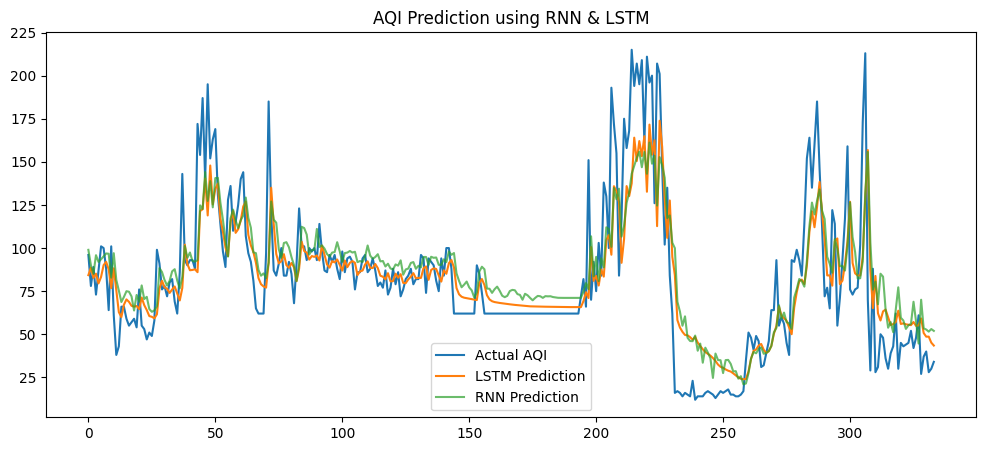

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_true, label='Actual AQI')
plt.plot(lstm_preds, label='LSTM Prediction')
plt.plot(rnn_preds, label='RNN Prediction', alpha=0.7)
plt.legend()
plt.title("AQI Prediction using RNN & LSTM")
plt.show()
